## 단계

### 거리를 저장하는 리스트과 우선순위 큐가 필요함

1. 초기화
    * 첫 정점을 기준으로 배열을 선언하여 첫 정점에서 각 정점까지의 거리를 저장한다.
        * 초기이므로 첫 노드는 0, 나머지는 무한대(inf)로 저장.
        * 우선순위 큐에 첫 노드(0)을 넣는다.

2. 한턴(반목문_탐색)

    * BFS와 유사하게, 첫 노드에 연결되어있는 노드를 너비로 순회한다.
    * 연결되어 있는 노드들을 우선순위큐에 넣어주는데, 이때 우선순위=거리 의 개념으로 이해한다.
    
    * 예를들어 거리가 1, 5 인 노드 C, B 가 있다고 하면 입력 순서에 상관없이 우선순위가 적용되어 C가 우선순위가 높은 것이다.
    
    
3. 우선순위(거리)를 통해서 최단거리 계산

    * 노드를 (너비우선)으로 순회하면서 우선순위 큐에 더 짧은 거리가 있다면 업데이트, 더 먼 거리라면 업데이트 하지 않는다.
    
4. 우선순위 큐에서 pop을 통해 뽑혀진 노드에서 거리순회

    * 새로운 노드에 연결되어있다면 거리저장리스트에 업데이트가 될 것.
    * 연결된 다른 노드를 순회 하면서, 역시 우선순위 큐에 저장한다.
    
5. 우선순위 큐에서 pop된 노드가 마지막노드일 때
    
    * 다른 노드로 향하지 않기 때문에, 다음 우선순위 큐로 이동한다.

In [2]:
import heapq

queue = []

heapq.heappush(queue, [2,'A'])
heapq.heappush(queue, [4,'B'])
heapq.heappush(queue, [1,'C'])
heapq.heappush(queue, [10,'D'])
heapq.heappush(queue, [3,'E'])


print(queue)

[[1, 'C'], [3, 'E'], [2, 'A'], [10, 'D'], [4, 'B']]


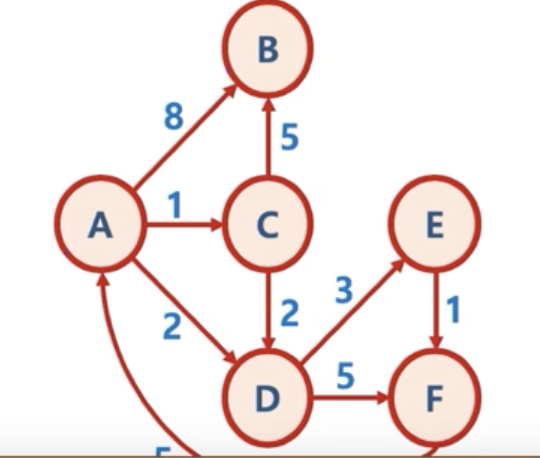

In [4]:
mygraph = {
    "A":{'B':8,'C':1,'D':2},
    "B":{},
    "C":{'B':5,'D':2},
    "D":{'E':3,'F':5},
    "E":{'F':1},
    "F":{'A':5}   
    
}

In [7]:
import heapq

def dijksta(graph, startpoint):
    
    distances = {node:float('inf') for node in graph} #거리저장 {노드이름:우선순위}
    distances[startpoint] = 0
    
    queue = []
    
    heapq.heappush(queue,[distances[startpoint],startpoint]) #(우선순위=거리,노드이름)
    
    while queue:
        current_distance, current_node = heapq.heappop(queue)
        
        if distances[current_node] < current_distance:
            continue
        
        #adjacent 인접노드
        for adjacent, weight in graph[current_node].items():

            print(adjacent, weight)
            distance = current_distance + weight
            
            #현재거리+인접노드까지의 거리 < 전체거리들 중 해당 노드까지의 거리
            if distance < distances[adjacent]:
                #거리 저장 업데이트
                distances[adjacent] = distance
                heapq.heappush(queue,[distance,adjacent])
                
    return distances
                
    
dijksta(mygraph,"A")

B 8
C 1
D 2
B 5
D 2
E 3
F 5
F 1
A 5


{'A': 0, 'B': 6, 'C': 1, 'D': 2, 'E': 5, 'F': 6}

### 시간복잡도

* 과정1. 인접한 노드 모두 검사
    * 모든 노드의 간선 검사 이므로 O(간선수)
* 과정2. 우선순위 큐에 노드/거리 정보 입력-삭제 과정
    * 우선순위큐 는 최소 힙(min heap)이기 때문에, 이 큐가 유지되는 것은 O(log 간선수)
    
### O(간선수 * log 간선수)

In [11]:
def is_empty(test):
    return len(test) == 1
    
is_empty([22,2])

False